In [2]:
import numpy as np
from matplotlib import pyplot 

In [406]:
# x(t) = 2cos(30t)
# y(t) = 3e^(-1.2t)cos(15t)

lin_space = np.arange(0.1,10+0.1,0.1)
lin_space1 = np.arange(0.01,3+0.01,0.01)

x_t = {
    't': lin_space,
    'f': [2*np.cos(30*t) for t in lin_space]
}
y_t = {
    't': lin_space1,
    'f': [3*np.exp(-1.2*t)*np.cos(10*t) for t in lin_space1]
}

def minmax(F, lin_space):
    def del_repetitive(l):
        n = []
        for i in l:
            if i not in n:
                n.append(i)
        return n
    
    def get_characterictics(scatters):
        sum = scatters[-1][1] - scatters[0][1]
        period = sum / len(scatters)   
        freq = 1./period
        omega = 2.*np.pi*freq
        return {'sum':sum, 'period':period, 'frequency':freq, 'omega':omega} 
    
    def get_mean(res):
        means = []
        for c in range(len(res)-1):
            means.append(res[c+1][1]-res[c][1])
        return np.mean(means)
    
    def get_scatters(res):
        scatters = []
        for i in range(len(res)-1):
            if res[i+1][1]-res[i][1] < get_mean(res):
                if res[i+1][0] > res[i][0]: 
                    scatters.append((res[i+1][0],res[i+1][1]))
                else:
                    scatters.append((res[i][0],res[i][1]))

            if res[i+1][1]-res[i][1] > get_mean(res):
                scatters.append((res[i][0],res[i][1]))
        return del_repetitive(scatters)
    
    def re_clear(scatters):
        return get_scatters(scatters)
    
    max_val = round(max(F),1)
    min_val = round(min(F),1)
    res = []
    res_min = []
    for index, f in enumerate(F):
        if round(f,1) == max_val:
            res.append((f,lin_space[index]))
        if round(f,1) == min_val:
            res_min.append((f,lin_space[index]))
    
   # if round(get_characterictics(get_scatters(res_min))['period'],1) != round(get_characterictics(get_scatters(res))['period'],1):
    return get_scatters(res), get_characterictics(get_scatters(res))

scatters, char = minmax(x_t['f'],x_t['t'])  
char

{'sum': 6.5,
 'period': 1.625,
 'frequency': 0.6153846153846154,
 'omega': 3.8665755736489764}

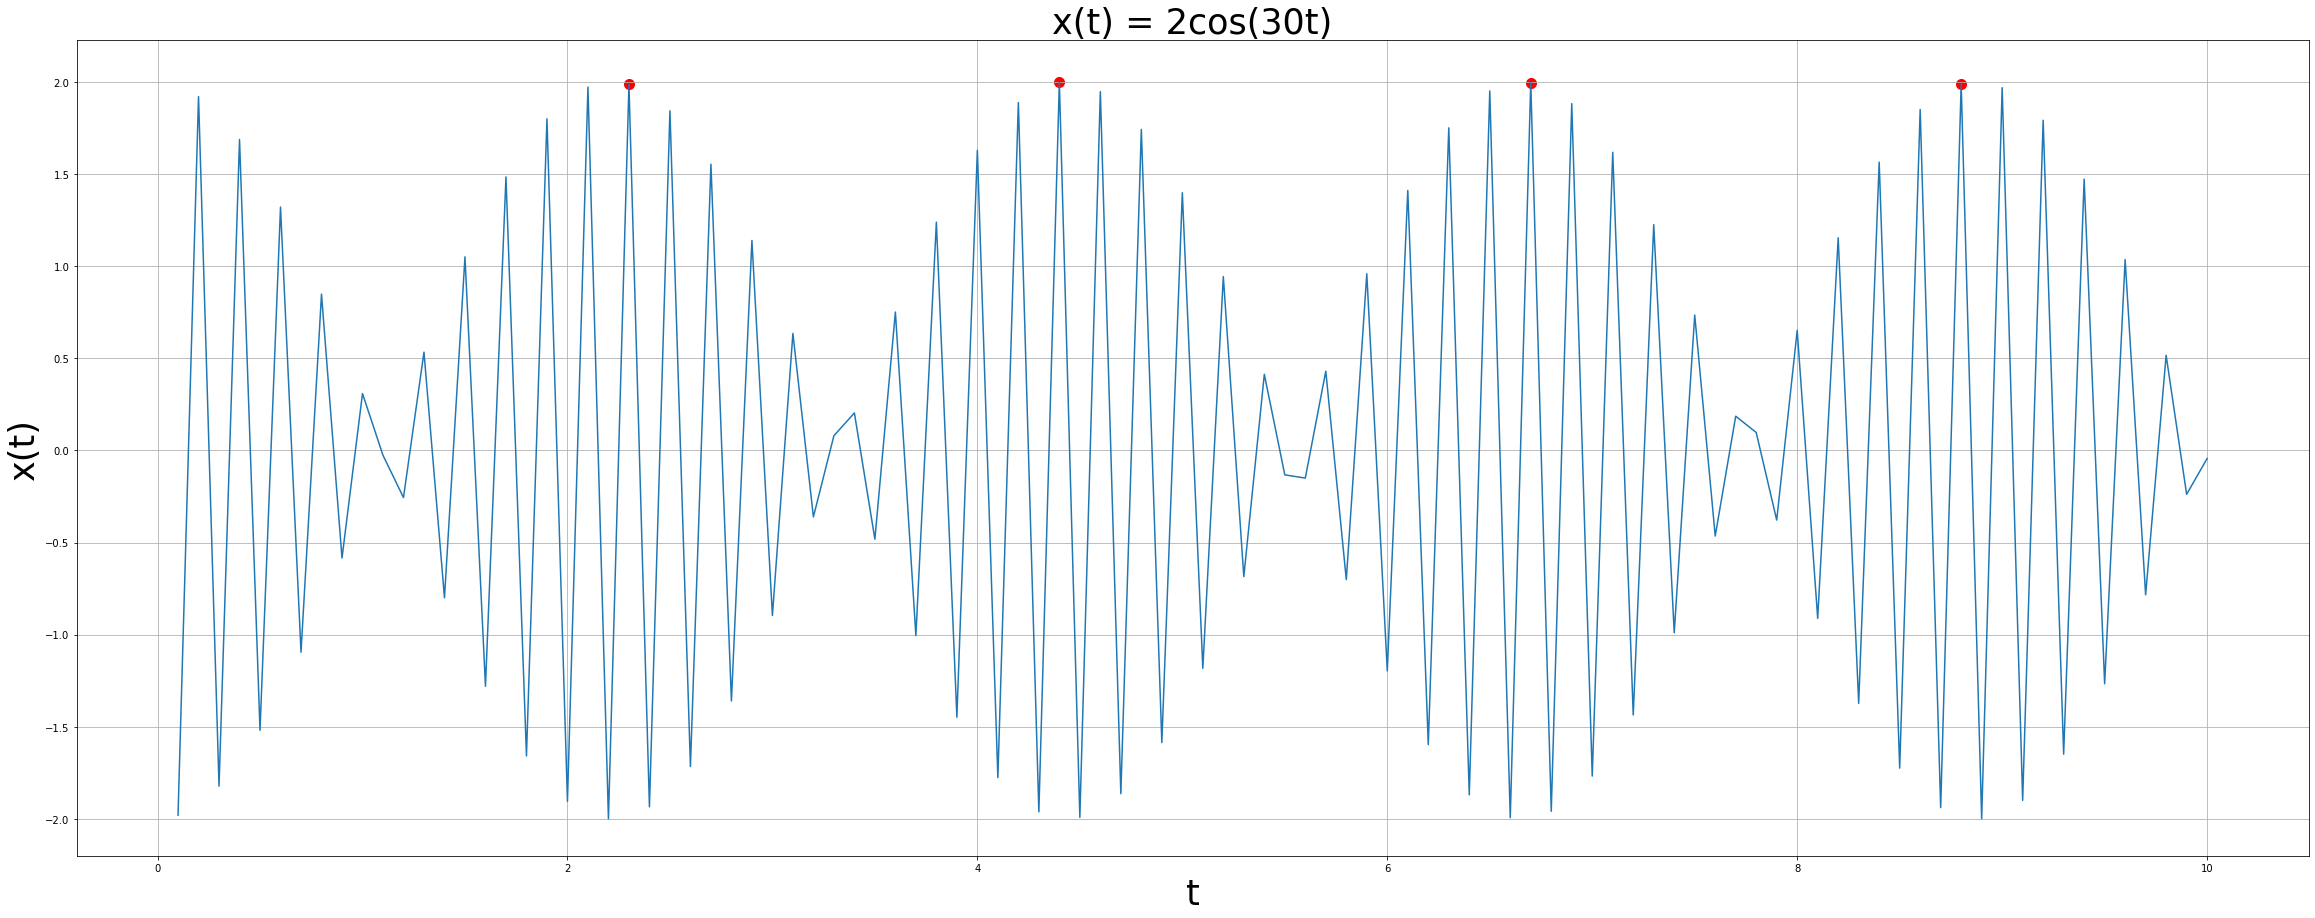

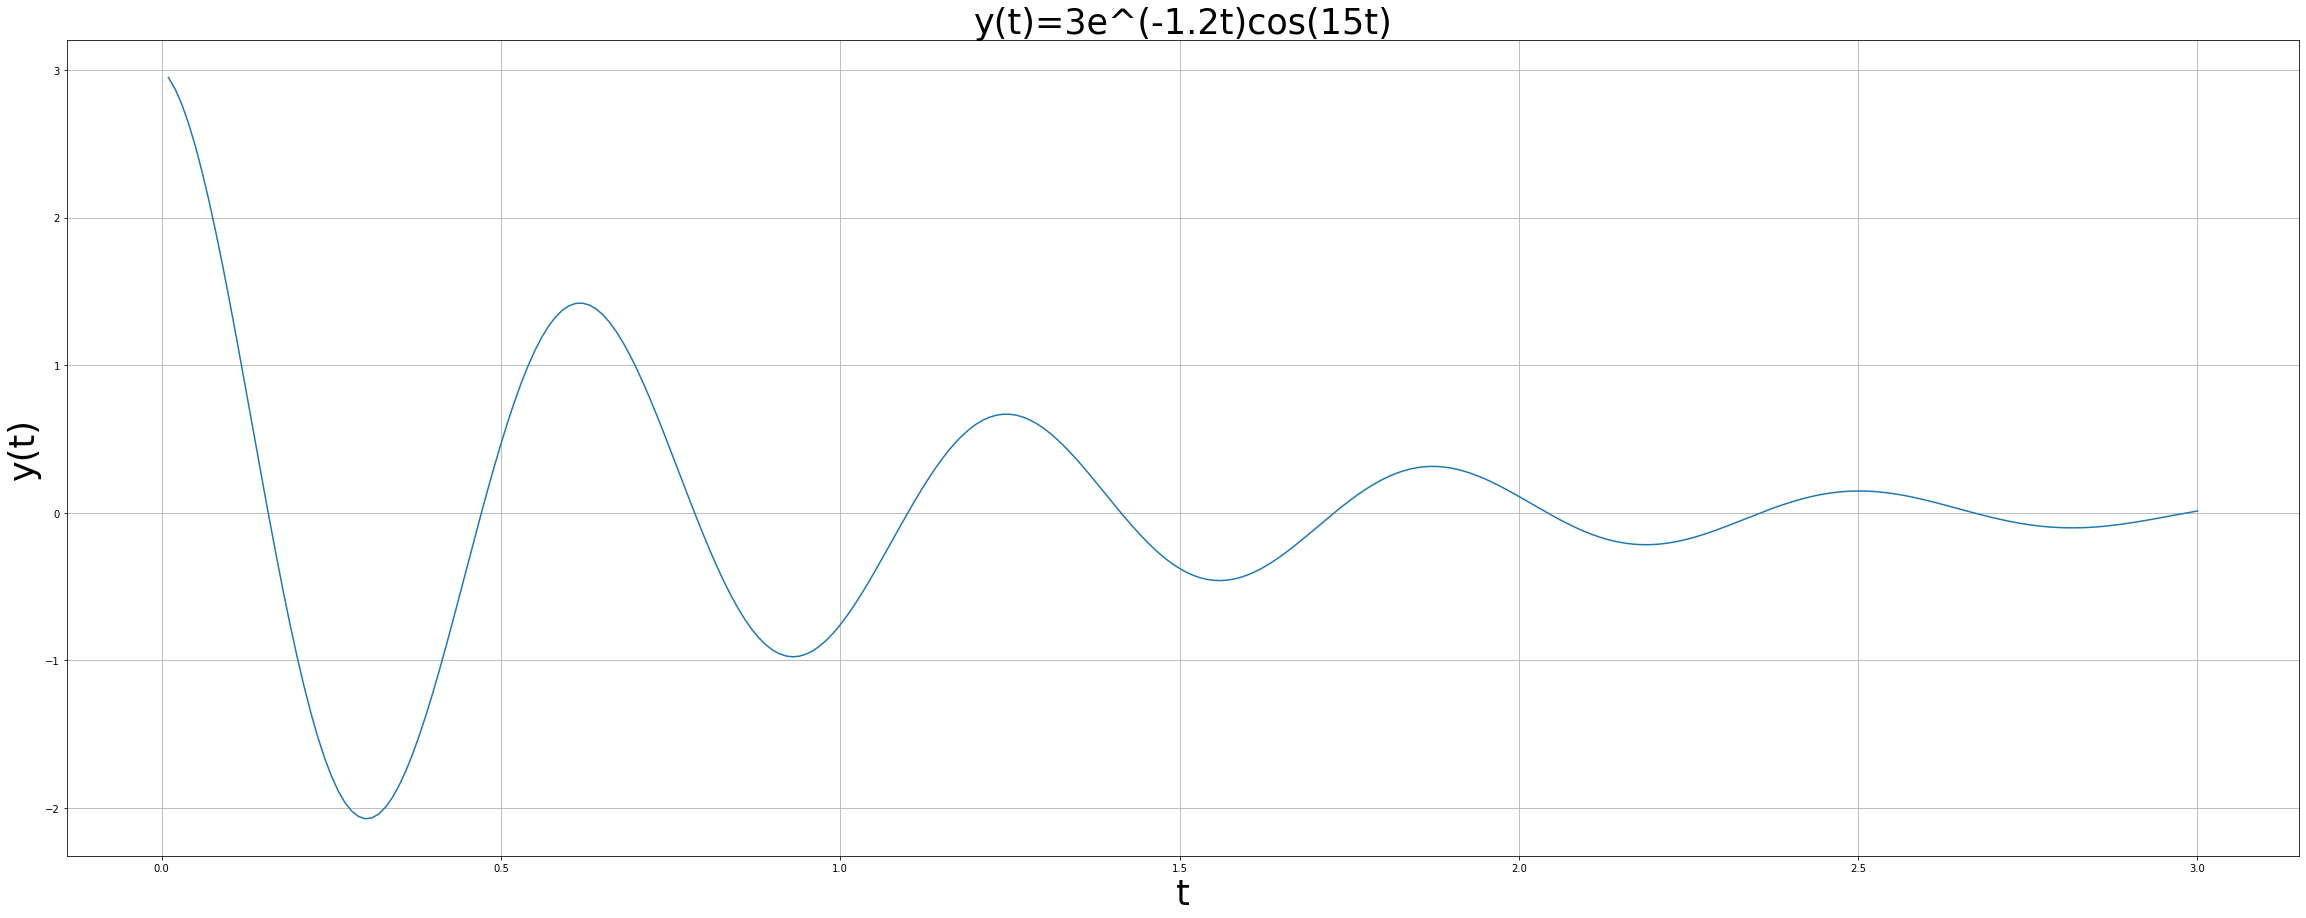

In [407]:
pyplot.figure(figsize = (40, 15))
pyplot.plot(x_t['t'], x_t['f'])
for scatter in scatters:
    pyplot.scatter(scatter[1],scatter[0], color='red', s=100)
pyplot.title('x(t) = 2cos(30t)',fontsize=35)
pyplot.xlabel('t', fontsize=35)
pyplot.ylabel('x(t)', fontsize=35)
pyplot.grid()
pyplot.show()

pyplot.figure(figsize = (40, 15))
pyplot.plot(y_t['t'], y_t['f'])
pyplot.title('y(t)=3e^(-1.2t)cos(15t)',fontsize=35)
pyplot.xlabel('t', fontsize=35)
pyplot.ylabel('y(t)', fontsize=35)
pyplot.grid()
pyplot.show()